In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Prepare data

In [ ]:
link_pos = "/content/drive/MyDrive/Thư mục không có tiêu đề/data_train/train/pos"
link_neg = "/content/drive/MyDrive/Thư mục không có tiêu đề/data_train/train/neg"

## read csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment_analysis_vietnamese/data - data.csv', index_col=-1)

In [ ]:
df.head

<bound method NDFrame.head of                                                comment label  rate
NaN                                     Áo bao đẹp ạ!!   POS     5
NaN                                        Tuyệt vời !   POS     5
NaN                         2day ao khong giong trong.   NEG     1
NaN                        Mùi thơm,bôi lên da mềm da.   POS     5
NaN                                  Vải đẹp, dày dặn.   POS     5
..                                                 ...   ...   ...
NaN                                   Không đáng tiền.   NEG     1
NaN                                      Quần rất đẹp.   POS     5
NaN                            Hàng đẹp đúng giá tiền.   POS     5
NaN                                   Chất vải khá ổn.   POS     4
NaN  áo rất ok nhé , vải mịn , len cao cổ này phối ...   POS     5

[31460 rows x 3 columns]>

In [ ]:
X = np.array(df.iloc[:, 0])
y = np.array(df.iloc[:, 1])
print(X[0])
print(X.shape)
print(y[0])
print(y.shape)

Áo bao đẹp ạ!!
(31460,)
POS
(31460,)


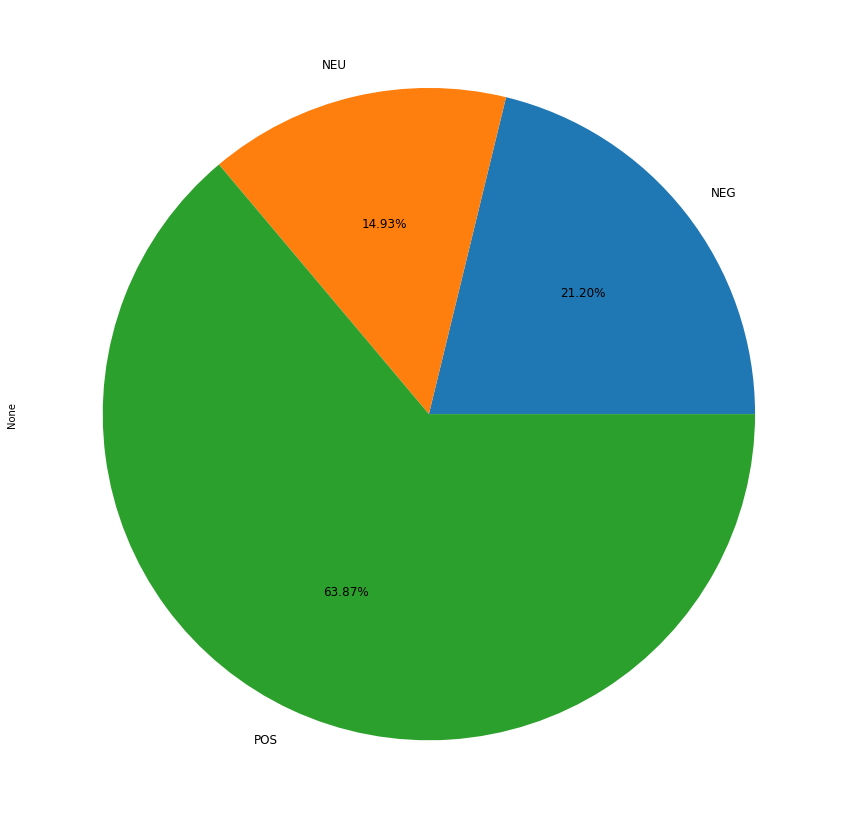

In [ ]:
data_label = pd.DataFrame(y, columns=['label']).groupby('label').size()
data_label.plot.pie(figsize=(15, 15), autopct="%.2f%%", fontsize=12)

In [ ]:
# print(y)
# x_pos = X[y == 'POS']
# y_pos = y[y == 'POS']
# print(y_pos.shape)
# print(x_pos.shape)

# x_neg = X[y == 'NEG']
# y_neg = y[y == 'NEG']

# x_neu = X[y == 'NEU']
# y_neu = y[y == 'NEU']

# l = x_neu.shape[0]

# x_neg = x_neg[:l]
# y_neg = y_neg[:l]

# x_pos = x_pos[:l]
# y_pos = y_pos[:l]

# print(x_neu.shape[0])
# print(x_pos.shape[0])
# print(x_neg.shape[0])

# X_main = np.append(x_neu, x_neg)
# X_main = np.append(X_main, x_pos)
# print(X_main.shape)

# y_main = np.append(y_neu, y_neg)
# y_main = np.append(y_main, y_pos)
# print(y_main.shape)

# print(X_main)
# print(y_main)

## Tách từ

In [ ]:
!pip install py4j
!git clone https://github.com/vncorenlp/VnCoreNLP.git
!pip install vncorenlp
import sys
sys.path.append('./VnCoreNLP')
from vncorenlp import VnCoreNLP



fatal: destination path 'VnCoreNLP' already exists and is not an empty directory.


In [ ]:
vncorenlp = VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')


In [ ]:
list = []
for i in range(10):
  tmp = vncorenlp.tokenize(X[i])
  list.append(tmp[0])

print(len(list))
print(list[:10])

10
[['Áo', 'bao', 'đẹp', 'ạ', '!'], ['Tuyệt_vời', '!'], ['2day', 'ao', 'khong', 'giong', 'trong', '.'], ['Mùi', 'thơm', ',', 'bôi', 'lên', 'da', 'mềm', 'da', '.'], ['Vải', 'đẹp', ',', 'dày_dặn', '.'], ['Hàng', 'rất', 'đẹp', ',', 'rất_chi_là', 'ưng_ý', '.'], ['Chất_lượng', 'sản_phẩm', 'tốt', ',', 'date', 'dài', '.'], ['Ăn_nói', 'và', 'thái_độ', 'phục_vụ', 'tốt', '.'], ['Đóng_gói', 'sản_phẩm', 'chắc_chắn', '.'], ['tất', 'sờn', 'hết', 'ca', 'chưa', 'dùng', 'mà', 'vay', 'r', '.']]


## n_gram(n = 3)

In [ ]:
def n_gram(list, n = 2):
  main_list = []
  for text in list:
    l = len(text)
    l = l - 1 if ( text[l-1] == '.' or text[l-1] == '!') else (l) # loại dấu câu nếu có ra khỏi câu
    if(l <= 1): 
      main_list.append(text[0])
      continue
    str_n = ""
    for i in range(1, n+1):
      # list_n = []  # dùng để lưu danh sách các string có n từ nối nhau trong 1 câu
      for j in range( l-i+1 ): 
        str = text[j]
        for k in range(1, i):
          str = str + "_" + text[j+k]
        str_n  = str_n + " " + str
    main_list.append(str_n)
  return np.array(main_list)

In [ ]:
main_list = n_gram(list, 1)
print(len(main_list))
print(len(y))
print(main_list[0])

31460
31460
 Áo bao đẹp ạ


## Train_test

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(main_list, y, random_state = 1, test_size=0.1)
print(X_test[2], y_test[2])

 Chất_lượng tạm được NEU


In [ ]:
print(X_train)

[' Lần nào mua hàng cũng rất ưng' ' Áo của sh siêu đẹp i hình 100% lun'
 ' Chất vải thun đơn_giản , mỏng' ...
 ' Xem như là test : ( ( chắc muốn mua áo dày phải đắt tiền hơn'
 ' Ban_đầu mình nghĩ là_ren mỏng , nhưng nhận đc thì thấy_ren đẹp hơn mình tưởng_tượng'
 ' Len mịn , dầy vừa ko dầy quá , giữ ấm tốt']


# Naive bayes

In [ ]:
X_train_pos = X_train[y_train == "POS"]
X_train_neg = X_train[y_train == "NEG"]
X_train_neu = X_train[y_train == "NEU"]

In [ ]:
print(X_train_pos[6])
print(X_train_neg[0])
print(X_train_neu[0])


 Đẹp xuất_sắc
 Chất vải thun đơn_giản , mỏng
 Vải mỏng_tanh đã thế áo còn ko có cúc


In [ ]:
# vectorizer = CountVectorizer()
# vectorizer.fit(X_train)
# # vectorizer.fit()

# print(len(vectorizer.vocabulary_))
# vector = vectorizer.transform(X_train)
# print(vector)
# print(y.shape)

In [ ]:
from collections import Counter
#input danh sách các câu, output dict gồm từ và xác suất của từ
def get_probability(list):
  test_list = list
  joined = " ".join(ele for ele in test_list)
  mappd = Counter(joined.split())
  total_val = sum(mappd.values())
  res = {key: val / total_val for key,
    val in mappd.items()}
  return res


In [ ]:
p_pos = get_probability(X_train_pos)
# print(p_pos)
p_neg = get_probability(X_train_neg)
# print(p_neg)
p_neu = get_probability(X_train_neu)
print(p_neu)

total = len(y)
y_list = y.tolist()
P_pos = y_list.count('POS') / total
P_neg = y_list.count('NEG') / total
P_neu = y_list.count('NEU') / total

{'Vải': 0.003959291788651889, 'mỏng_tanh': 2.7882336539802036e-05, 'đã': 0.0017565872020075283, 'thế': 0.0003067057019378224, 'áo': 0.008057995260002788, 'còn': 0.002397880942422975, 'ko': 0.008894465356196849, 'có': 0.007026348808030113, 'cúc': 0.0002230586923184163, 'Áo': 0.0076676425484455595, 'vẫn': 0.002342116269343371, 'tốt': 0.005353408615641991, 'nhưng': 0.015418932106510526, 'sai': 0.0010316464519726752, 'mẫu': 0.0012825874808308937, 'không': 0.007333054509967935, 'biết': 0.002202704586644361, 'do': 0.0009758817788930712, 'shop': 0.011125052279381013, 'nhầm_lẫn': 5.576467307960407e-05, 'hay': 0.0006691760769552489, 'hết': 0.0012268228077512895, 'hàng': 0.014415167991077652, 'lấy': 0.000864352432733863, 'khác': 0.0018959988847065384, 'thay': 0.0002230586923184163, 'vào': 0.0013662344904502998, 'mà': 0.005632231981040011, 'hỏi': 0.0004461173846368326, 'ý_kiến': 5.576467307960407e-05, 'gì': 0.0011431757981318835, 'cả': 0.0008922347692736652, 'Chất': 0.003457409730935452, 'cũng': 

In [ ]:
print(P_pos, P_neg, P_neu)

0.6386840432294978 0.21198347107438018 0.14933248569612206


In [ ]:
test = ["đẹp", "đẹp quá", "quần không đẹp", "quần tạm được"]

In [ ]:
def predict(X):
  return np.array([_predict(x) for x in X])
def _predict(x):
  l = len(x)
  str = x.split()
  l = len(str)
  ans_pos = 0.0
  ans_neu = 0.0
  ans_neg = 0.0
  for i in range(l):
    if p_pos.get(str[i]) is None:
      ans_pos += np.log(1e-7) 
    else:
      p = p_pos.get(str[i])
      ans_pos += np.log(p) 

    if p_neg.get(str[i]) is None:
      ans_neg += np.log(1e-7) 
    else:
      p = p_neg.get(str[i])
      ans_neg += np.log(p) 

    if p_neu.get(str[i]) is None:
      ans_neu += np.log(1e-7) 
    else:
      p = p_neu.get(str[i]) 
      ans_neu += np.log(p) 
  ans_pos += np.log(P_pos)
  ans_neg += np.log(P_neg)
  ans_neu += np.log(P_neu)
  ave = [ans_pos, ans_neu, ans_neg]
  ans = np.argmax(ave)
  classes = ["POS", "NEU", "NEG"]
  return classes[ans]

In [ ]:
y_pred = predict(X_test)
print(y_pred)
print(len(y_pred))
print(len(y_pred[y_pred == "POS"]))
print(len(y_pred[y_pred == "NEU"]))
print(len(y_pred[y_pred == "NEG"]))

['NEG' 'NEG' 'NEU' ... 'POS' 'POS' 'NEU']
3146
1973
481
692


In [ ]:
print('accuracy = ', accuracy_score(y_test, y_pred))

accuracy =  0.7345835982199619


# Nháp

In [ ]:
{'a': 0, 'b':1, }

In [ ]:
print(type(vectorizer.vocabulary_))

In [ ]:
total = len(y)
y_list = y.tolist()
P_pos = y_list.count('POS') / total
P_neg = y_list.count('NEG') / total
P_neu = y_list.count('NEU') / total

In [ ]:
print(vector.shape)

In [ ]:
n_data, n_dictionary = vector.shape
p_pos = np.zeros(n_dictionary, dtype=np.float64) 
p_neg = np.zeros(n_dictionary, dtype=np.float64) 
p_neu = np.zeros(n_dictionary, dtype=np.float64)

In [ ]:
print(n_data)

In [ ]:
label = np.unique(y)
n_label = len(label)

In [ ]:
print(vector[0])

In [ ]:
print(vector[3].indices)
print(vector[3].indices[0])

In [ ]:
vector_pos = vector[y == 'POS']
vector_neg = vector[y == 'NEG']
vector_neu = vector[y == 'NEU']


In [ ]:
for word in range(n_dictionary):
  sum_pos = 0
  sum_neg = 0
  sum_neu = 0
  for i in range(n_data):
    for j in range(len(vector[i].indices)):
      if(vector[i].indices[j] == word):


In [ ]:
for word in range(n_dictionary):
  sum_pos = 0
  sum_neg = 0
  sum_neu = 0
  for i in range(n_data):
    for j in range(len(vector[i].indices)):
      if(vector[i].indices[j] == word):
        if(y[i] == 'POS'):
            sum_pos += vector[i].data[j]
        elif ( y[i] == 'NEG'):
            sum_neg += vector[i].data[j]
        else:
            sum_neu += vector[i].data[j]
  p_pos[word] = sum_pos/n_dictionary
  p_neg[word] = sum_neg/n_dictionary
  p_neu[word] = sum_neu/n_dictionary

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vector_main, y, test_size = 0.1, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

### Navie bayse

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        # n_data: số lượng câu
        # n_dictionary: số lượng từ trong từ điển
        self.X = X
        self.y = y

        total = len(y)
        y_list = y.tolist()
        P_pos = y_list.count('POS') / total
        P_neg = y_list.count('NEG') / total
        P_neu = y_list.count('NEU') / total

        n_data, n_dictionary = X.shape
        p_pos = np.zeros(n_dictionary, dtype=np.float64) 
        p_neg = np.zeros(n_dictionary, dtype=np.float64) 
        p_neu = np.zeros(n_dictionary, dtype=np.float64) 

        self._label = np.unique(y)
        n_label = len(self._label)
        for word in range(n_dictionary):
          sum_pos = 0
          sum_neg = 0
          sum_neu = 0
          for i in range(n_data):
            if(y[i] == 'POS'):
              sum_pos += X[i][word]
            elif ( y[i] == 'NEG'):
              sum_neg += X[i][word]
            else:
              sum_neu += X[i][word]
          p_pos[word] = sum_pos/n_dictionary
          p_neg[word] = sum_neg/n_dictionary
          p_neu[word] = sum_neu/n_dictionary
        self.p = np.array([p_neg, p_neu, p_pos])
        self.P = np.array([P_neg, P_neu, P_pos])
        


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        
        l = len(x)
        
        for idx in range(self.n_label):
            p = 0;
            ans = 0
            name_label = self._label[idx]
            for word in x:
                if vectorizer.vocabulary_.get(word) is None:
                    continue
                else:
                    tmp = vectorizer.vocabulary_.get(word)
                    ans = ans + np.log(self.p[idx][tmp])
            ans += np.log(self.P[idx])
            posteriors.append(ans)

        y_pred = np.argmax(posteriors)
        return self._label[y_pred]
        

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:

from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test, y_pred))

# TEST

In [ ]:
import unittest

In [ ]:
from typing import AnyStr
class Test(unittest.TestCase):
  def test_tach_tu(self):
    sentences = 'VTV đồng ý chia sẻ bản quyền World Cup 2018 cho HTV để khai thác. ' \
            'Nhưng cả hai nhà đài đều phải chờ sự đồng ý của FIFA mới thực hiện được điều này.'
    test_list = [['VTV', 'đồng_ý', 'chia_sẻ', 'bản_quyền', 'World_Cup', '2018', 'cho', 'HTV', 'để', 'khai_thác', '.'], ['Nhưng', 'cả', 'hai', 'nhà', 'đài', 'đều', 'phải', 'chờ', 'sự', 'đồng_ý', 'của', 'FIFA', 'mới', 'thực_hiện', 'được', 'điều', 'này', '.']]
    self.assertListEqual(vncorenlp.tokenize(sentences) , test_list)
  def test_n_gram(self):
    list = [['Áo', 'bao', 'đẹp', 'ạ', '!'], ['Tuyệt_vời', '!']]
    test_main_list = n_gram(list, 2)
    tmp = [' Áo bao đẹp ạ Áo_bao bao_đẹp đẹp_ạ','Tuyệt_vời']
    self.assertEqual( test_main_list.tolist(), tmp)
  def test_probability(self):
    test_list = ["a b c d",
			"A b c d"]
    ans = get_probability(test_list)
    self.assertEqual(ans, {'a': 0.125, 'b': 0.25, 'c': 0.25, 'd': 0.25, 'A': 0.125})


In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)